<a href="https://colab.research.google.com/github/hazamp01/Machine_Learning/blob/main/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset 32*32 with 10 diff objects all are color images
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
 x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

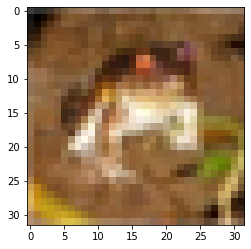

In [6]:
plt.imshow(x_train[0])

In [11]:
x_train[0].max()

255

In [12]:
x_train=x_train/255

In [13]:
x_test=x_test/255

In [14]:
x_test.shape

(10000, 32, 32, 3)

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
# it should be categorical
from tensorflow.keras.utils import to_categorical
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [18]:
y_test[0]

array([3], dtype=uint8)

In [19]:
y_train[0]

array([6], dtype=uint8)

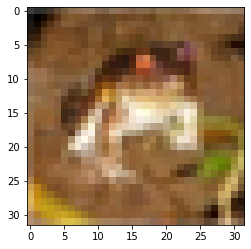

In [21]:
plt.imshow(x_train[0])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [25]:
32*32*3

3072

In [38]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))



model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [42]:
model.fit(x_train,y_cat_train,epochs=15,
          validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 56s 35ms/step - loss: 1.6988 - accuracy: 0.3775 - val_loss: 1.2717 - val_accuracy: 0.5503
Epoch 2/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1907 - accuracy: 0.5829 - val_loss: 1.1718 - val_accuracy: 0.5838
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0350 - accuracy: 0.6345 - val_loss: 1.0944 - val_accuracy: 0.6180
Epoch 4/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9121 - accuracy: 0.6813 - val_loss: 0.9688 - val_accuracy: 0.6573
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8029 - accuracy: 0.7214 - val_loss: 0.9555 - val_accuracy: 0.6708
Epoch 6/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7200 - accuracy: 0.7483 - val_loss: 0.9714 - val_accuracy: 0.6636
Epoch 7/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.6440 - accuracy: 0.7777 - val_loss: 0.9949 -

In [43]:
# EVALUATE MODEL
metrics=pd.DataFrame(model.history.history)

In [44]:
 metrics

,loss,accuracy,val_loss,val_accuracy
0,1.490541,0.45968,1.271699,0.5503
1,1.161394,0.59130,1.171771,0.5838
2,1.018552,0.64106,1.094389,0.6180
3,0.906133,0.68354,0.968828,0.6573
4,0.817119,0.71524,0.955520,0.6708
5,0.732366,0.74522,0.971391,0.6636
6,0.660532,0.77042,0.994931,0.6700


In [45]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

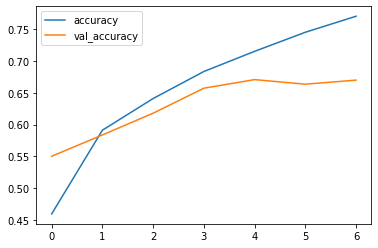

In [46]:
metrics[['accuracy','val_accuracy']].plot()

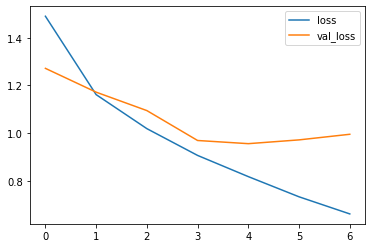

In [47]:
metrics[['loss','val_loss']].plot()

In [48]:
model.evaluate(x_test,y_cat_test,verbose=True)

313/313 [==============================] - 3s 10ms/step - loss: 0.9949 - accuracy: 0.6700


[0.9949305653572083, 0.6700000166893005]

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
prediction=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [51]:
print (classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71      1000
           1       0.77      0.82      0.80      1000
           2       0.54      0.58      0.56      1000
           3       0.54      0.47      0.50      1000
           4       0.61      0.59      0.60      1000
           5       0.63      0.45      0.53      1000
           6       0.64      0.84      0.73      1000
           7       0.72      0.74      0.73      1000
           8       0.85      0.68      0.76      1000
           9       0.77      0.74      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [52]:
print (confusion_matrix(y_test,prediction))

[[791  23  46  10  27   6  17  10  44  26]
 [ 29 822  11  10   3   4  23   3  18  77]
 [ 78   8 576  55  79  42 111  32   7  12]
 [ 27  17  97 466  95 111 120  38   8  21]
 [ 32   3 106  43 593  29 100  78  12   4]
 [ 19   6 100 187  63 450  65  95   4  11]
 [  9  10  49  36  30   9 841   5   4   7]
 [ 26  12  42  25  62  47  15 740   3  28]
 [150  52  24  15  15   8   8   5 682  41]
 [ 53 114  14  17   9   4  13  19  18 739]]


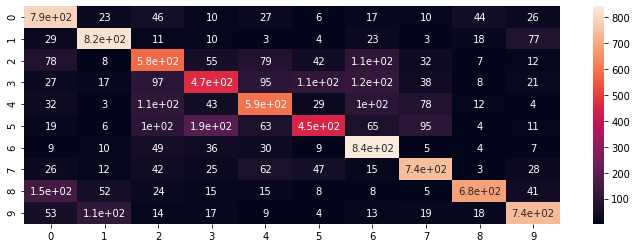

In [57]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

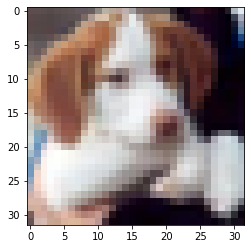

In [64]:
my_image=x_test[16]
plt.imshow(my_image)

In [65]:
model.predict_classes(my_image.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5])